<font size="4">**Importing Required Libraries**</font> 

In [1]:
#<font size="5">**your_text_here**</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style= "whitegrid", font_scale=1.3)

<font size="4">**Loading the Dataset**</font> 

In [3]:
df= pd.read_csv('zomato.csv')

<font size="4">**Examining the Dataset**</font>

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [6]:
import pandas_profiling as pp

In [7]:
pp.ProfileReport(df)

C:\Users\vaibhav\Anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 5).')
  correlation_name=correlation_name, error=error


<font size="6">**Data Preparation and Processing**</font>

<font size="3">**(1) Calculating % of missing values in each column**</font>

In [27]:
a = df.isnull().sum()/len(df)*100
missing_data = pd.DataFrame({'Missing Value %' :a}).sort_values('Missing Value %',ascending=False)
missing_data.head(8)

,Missing Value %
dish_liked,54.291626
rate,15.033741
phone,2.335789
approx_cost(for two people),0.669026
rest_type,0.438927
cuisines,0.087012
location,0.040606
listed_in(type),0.000000


<font size="3">**Processing column with missing values**</font>

In [28]:
df['dish_liked'].fillna(value='None', inplace = True)

In [29]:
len(df['rate'].value_counts()) # there are 64 different types of ratings.

64

In [30]:
df['rate'].replace(['NEW','-'],[3,0],inplace = True) #Replacing ratings for NEW resturants with 3 rating

<font size="3">From now onwards we'll work with a new dataframe **df3** which is copy of the orignal dataframe df, such that any changes in the dataframe df3 won't affect the orignal dataframe.</font>

In [31]:
df3 = df.copy(deep = True)

<font size="3"> Converting data type of those columns which should be treated as numeric</font>

In [32]:
df3['rate']= df3['rate'].astype(str)

In [33]:
df3['rate'] = df3['rate'].apply(lambda x: x[0:3]) # to remove ''/5' from rate column entries

In [34]:
df3['rate']= df3['rate'].astype(float)

In [35]:
df3['rate'].fillna(value = df3['rate'].mean()).head() #Treating missing values in the rate column

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [36]:
df3.dropna(inplace = True)

In [37]:
df3.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari





<font size="3"> When we view the detailed dataset, we observe that the column 'approx_cost(for two people)' has values in the form og (1,200), (1,400) etc for values above 1000 Rs , due to which the column can't be treated as numeric data. </font>

<font size="4"> Processing **'approx_cost(for two people)'** column to convert into numeric data </font>

In [38]:
df3.rename(columns = {'approx_cost(for two people)':'approx_cost'},inplace = True)

In [39]:
df3['approx_cost'] = df3['approx_cost'].apply(lambda x: x.replace(',',''))

In [40]:
df3['approx_cost'] = df3['approx_cost'].astype(float)

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42944 entries, 0 to 51716
Data columns (total 17 columns):
url                42944 non-null object
address            42944 non-null object
name               42944 non-null object
online_order       42944 non-null object
book_table         42944 non-null object
rate               42944 non-null float64
votes              42944 non-null int64
phone              42944 non-null object
location           42944 non-null object
rest_type          42944 non-null object
dish_liked         42944 non-null object
cuisines           42944 non-null object
approx_cost        42944 non-null float64
reviews_list       42944 non-null object
menu_item          42944 non-null object
listed_in(type)    42944 non-null object
listed_in(city)    42944 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 5.9+ MB


<font size="3">**Creating my own pallete (for better visualisation)**</font>

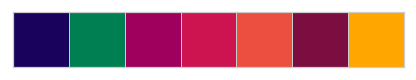

In [42]:
#Creating my own pallete
my_pallete = ['#18025c','#008052','#9f005d','#cd1450','#ec4f3f','#7c0d40','#ffa600']
sns.set_palette(my_pallete)
sns.palplot(sns.color_palette()) #Setting your own palle

In [43]:
df4 = df3.groupby('listed_in(type)')

In [44]:
df4.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
10,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,080 26724489\r\n+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
11,https://www.zomato.com/bangalore/cafe-shuffle-...,"941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...",Cafe Shuffle,Yes,Yes,4.2,150,+91 9742166777,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600.0,"[('Rated 1.0', ""RATED\n \n\nHorrible. Not even...",[],Cafes,Banashankari


(0, 4.5)

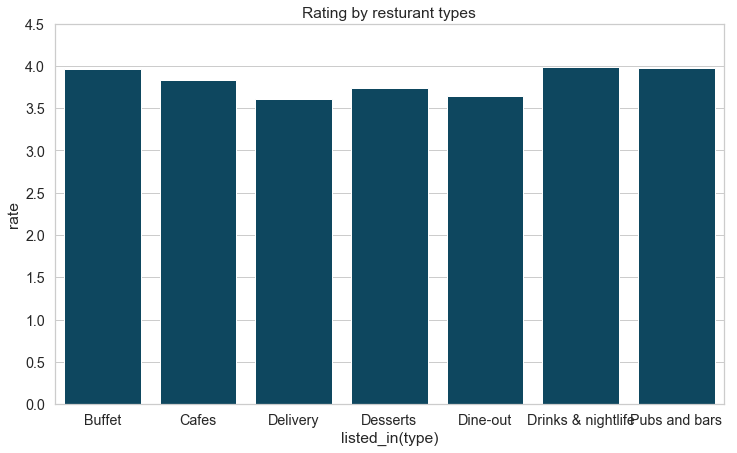

In [45]:

fig = plt.subplots(figsize=(12, 7))
ax = sns.barplot(x = 'listed_in(type)', y = 'rate', data = df3 , ci = None,color='#004c6d').set_title('Rating by resturant types')
ax = plt.gca()
ax.set_ylim([0,4.5])

In [46]:
#df4 = df3.copy(deep = True)

In [47]:
#df4['rest_type'] = df4['rest_type'].apply(lambda x : x.split(',',1)[0])

In [48]:
#word.split(',', 1)[0]

<font size="4">**Average cost by resturant type**</font>

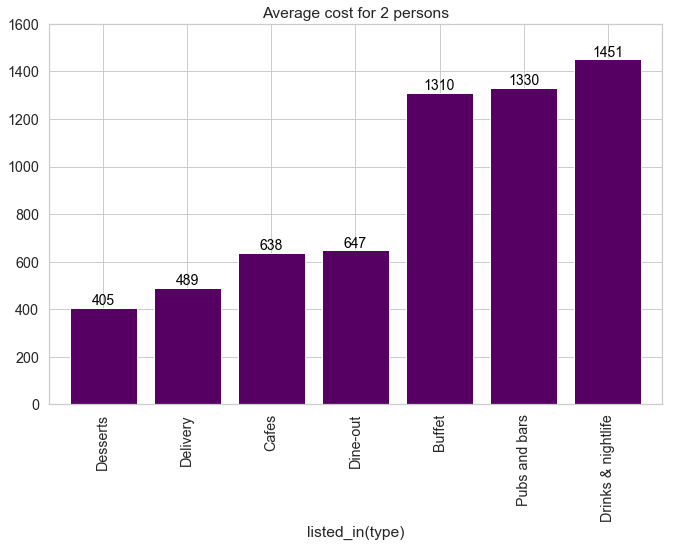

In [49]:
fig = plt.subplots(figsize=(11, 7))
ax = df3.groupby('listed_in(type)')['approx_cost'].mean().sort_values(ascending = True).plot(kind = 'bar',color = '#560063',title ='Average cost for 2 persons',width = 0.8)
ax = plt.gca()
ax.set_ylim([0,1600]) #to set limit on y axis
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=14, color='Black', ha='center', va='bottom')

plt.show()

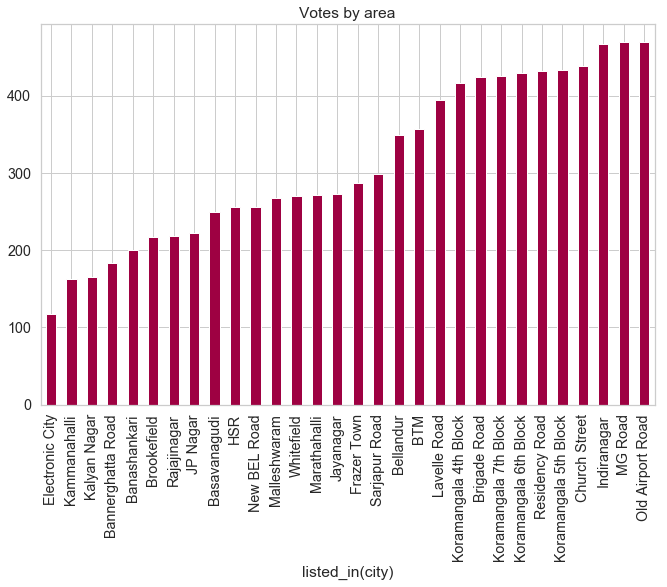

In [50]:
fig = plt.subplots(figsize=(11, 7))
ax = df3.groupby('listed_in(city)')['votes'].mean().sort_values(ascending = True).plot(kind = 'bar',colormap = 'Spectral',title ='Votes by area')


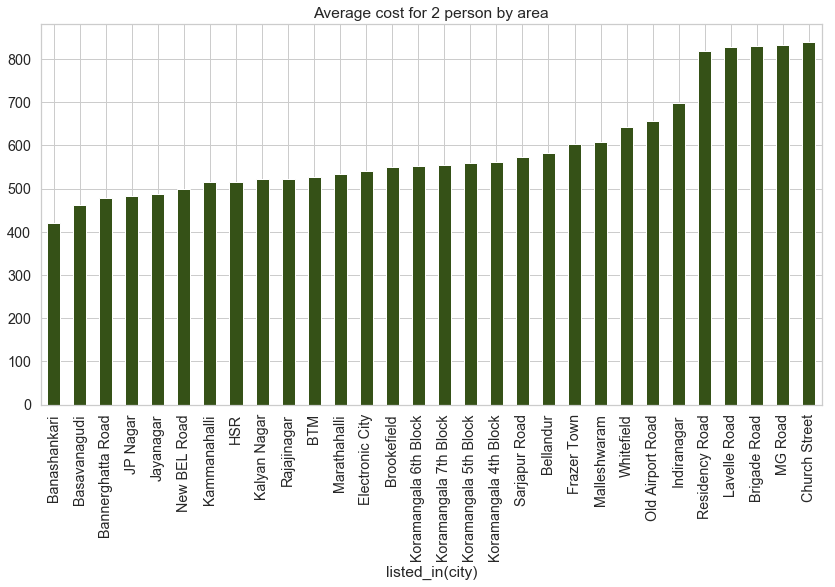

In [51]:
fig = plt.subplots(figsize=(14, 7))
ax = df3.groupby('listed_in(city)')['approx_cost'].mean().sort_values(ascending = True).plot(kind = 'bar',color = '#355117',title ='Average cost for 2 person by area')

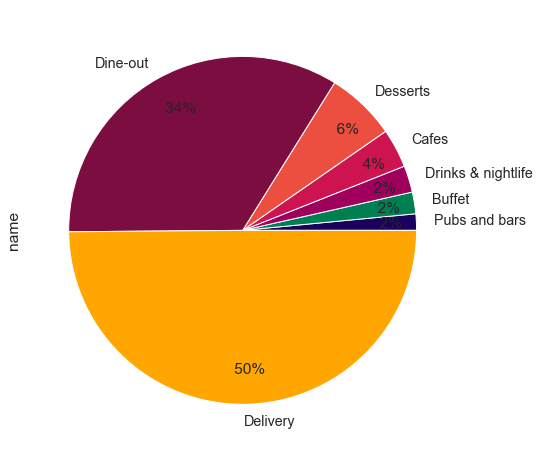

In [52]:
fig = plt.subplots(figsize=(14,8))
plt.gca()
ax= df3.groupby('listed_in(type)')['name'].count().sort_values().plot(kind = 'pie', autopct='%5.0f%%', pctdistance=.8,startangle=0)


In [53]:
df6 = pd.DataFrame(df3.groupby('listed_in(type)')['name'].count()/len(df3)*100)

In [54]:
df6.rename(columns={'name':'percentage occurence'})

,percentage occurence
listed_in(type),
Buffet,2.014251
Cafes,3.620995
Delivery,49.869598
Desserts,6.489847
Dine-out,34.002422
Drinks & nightlife,2.479974
Pubs and bars,1.522914


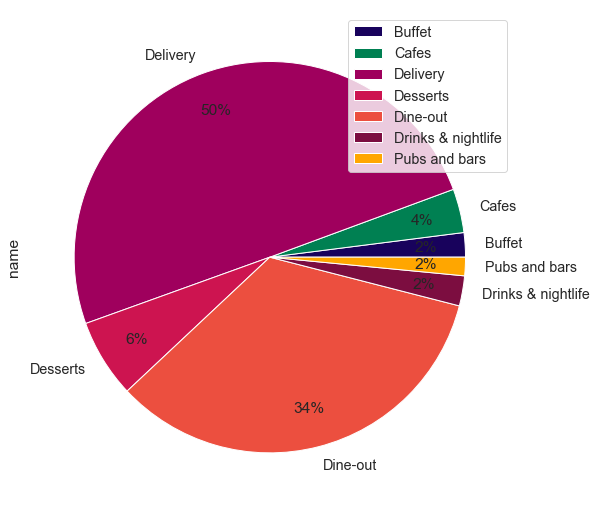

In [55]:
ax= df6.plot(kind = 'pie', autopct='%1.0f%%',pctdistance=.8,subplots = True,figsize = (16,9),layout = None)

In [56]:
df3['dish_liked'].value_counts()

None                                                                                             19751
Biryani                                                                                            181
Chicken Biryani                                                                                     73
Friendly Staff                                                                                      69
Waffles                                                                                             68
                                                                                                 ...  
Salad, Thali, Pumpkin Soup, Millet Pizza, Misal Pav, Mushroom Soup, Chaat                            1
Lassi, Panneer Butter Masala, Paratha, Jeera Rice, Paneer Parantha, Veg Kolhapuri, Bhindi Fry        1
Masala Dosa, Filter Coffee, Lunch Thali, Rava Idli, Neer Dosa, Medu Vada, Tea                        1
Burgers, Fries, Jumbo Royale Burger, Salads, Peri Peri Chicken Salad, Pot

In [57]:
def func2(df,col):
    my_list= []
    for i in df[col]:
        list = i.split(',')
        my_list.extend(list)
    return my_list

In [58]:
df_most_liked_dish = pd.DataFrame(func2(df3,'dish_liked'))

In [59]:
df_most_liked_dish.columns = ['dish_name']

In [60]:
df_most_liked_dish.drop(df_most_liked_dish[df_most_liked_dish['dish_name'] == 'None'].index, inplace = True)

In [61]:
df_most_liked_dish = pd.DataFrame(df_most_liked_dish['dish_name'].value_counts())

In [62]:
df_most_liked_dish.head(10)

,dish_name
Pasta,2660
Pizza,1917
Cocktails,1876
Burgers,1728
Mocktails,1599
Biryani,1316
Sandwiches,1281
Burgers,1240
Nachos,1171
Coffee,1156


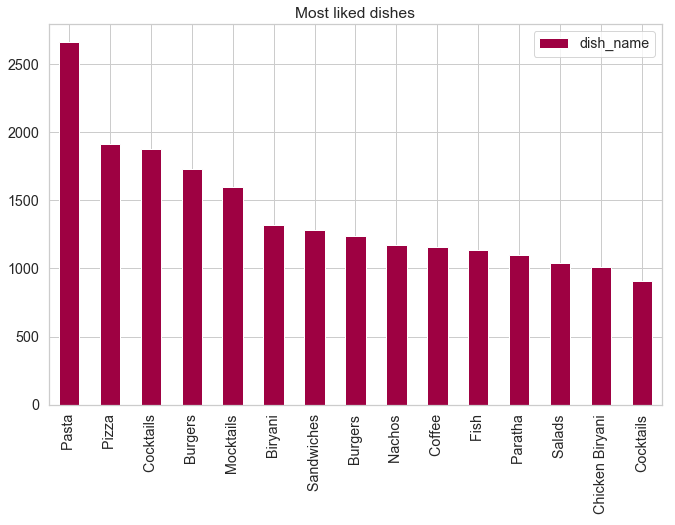

In [63]:
df_most_liked_dish.head(15).plot(kind = 'bar',colormap = 'Spectral',title ='Most liked dishes',figsize=(11, 7))

In [64]:
df4 = df3.drop_duplicates(subset = 'name',keep = 'first')

In [65]:
# Most liked Cuisines

In [68]:
def func2(df,col):
    my_list2 = []
    for i in df[col]:
        list = i.split(',')
        my_list2.extend(list)
    return my_list2

In [69]:
df_most_liked_cuisine = pd.DataFrame(func2(df4,'cuisines'))

In [70]:
df_most_liked_cuisine.columns = ['cuisine_type']

In [71]:
df_most_liked_cuisine['cuisine_type'] = df_most_liked_cuisine['cuisine_type'].apply(lambda x : x.replace(' ',''))

In [72]:
df_most_liked_cuisine['cuisine_type'].value_counts()

NorthIndian    3211
Chinese        2422
SouthIndian    1445
FastFood       1034
Biryani         928
               ... 
Indian            1
Vegan             1
Belgian           1
Australian        1
Sindhi            1
Name: cuisine_type, Length: 106, dtype: int64

In [73]:
df_most_liked_cuisine = pd.DataFrame(df_most_liked_cuisine['cuisine_type'].value_counts())

In [74]:
df_most_liked_cuisine.head()

,cuisine_type
NorthIndian,3211
Chinese,2422
SouthIndian,1445
FastFood,1034
Biryani,928


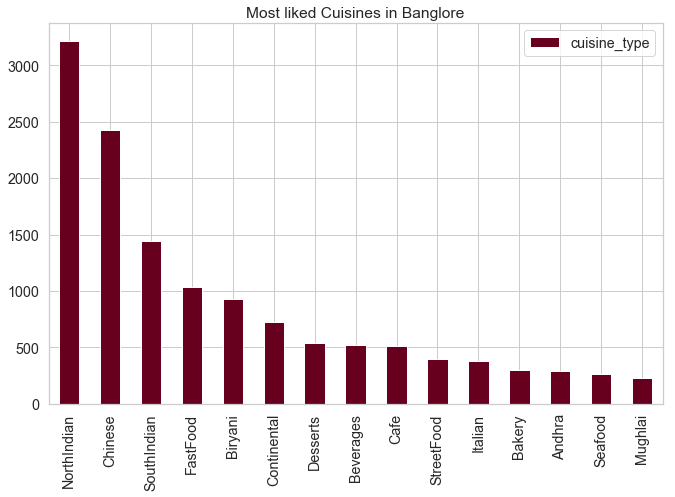

In [75]:
df_most_liked_cuisine.head(15).plot(kind = 'bar',colormap = 'RdGy',title ='Most liked Cuisines in Banglore',figsize=(11, 7))

In [76]:
#DEFINING BEST RESTURANT ON THE BASIS OF 3 PARAMETERS
# 1. No. of Votes - (Reliability)
# 2. Rating
# 3. Average Cost

In [77]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42944 entries, 0 to 51716
Data columns (total 17 columns):
url                42944 non-null object
address            42944 non-null object
name               42944 non-null object
online_order       42944 non-null object
book_table         42944 non-null object
rate               42944 non-null float64
votes              42944 non-null int64
phone              42944 non-null object
location           42944 non-null object
rest_type          42944 non-null object
dish_liked         42944 non-null object
cuisines           42944 non-null object
approx_cost        42944 non-null float64
reviews_list       42944 non-null object
menu_item          42944 non-null object
listed_in(type)    42944 non-null object
listed_in(city)    42944 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 7.1+ MB


In [78]:
df_3 = df3[['name','rate','votes','dish_liked','approx_cost','listed_in(type)']]

In [79]:
df_3= df_3.drop_duplicates(subset='name',keep='first')

In [80]:
Q3_votes = np.percentile(df_3['votes'],75)

In [81]:
df_3_most_reliable = df_3[df_3['votes']> Q3_votes ]

In [82]:
df_3_affordable = df_3[df_3['approx_cost'] <  1500] #Resturants lower than 25 quaruntile in terms of cost

In [83]:
#Q3_rateing = np.percentile(df_3['rate'],75)

In [84]:
df_3_highest_rated = df_3[df_3['rate'] >= 4.5 ]

In [85]:
df_best_1 = pd.merge(df_3_highest_rated,df_3_affordable,how='inner',on=['name'])

In [86]:
df_best_1.shape

(74, 11)

In [87]:
df_best = pd.merge(df_best_1,df_3_most_reliable,how='inner',on=['name'])

In [88]:
df_best = df_best.iloc[0:,:6]

In [89]:
df_best

,name,rate_x,votes_x,dish_liked_x,approx_cost_x,listed_in(type)_x
0,Onesta,4.6,2556,"Farmhouse Pizza, Chocolate Banana, Virgin Moji...",600.0,Cafes
1,The Blue Wagon - Kitchen,4.6,228,"Pizza, Nachos, Garlic Maggi, Burgers, Cheese M...",400.0,Delivery
2,Shakes Theory,4.5,155,"Sandwiches, Thick Shakes, Paan Shake, Brownie ...",300.0,Delivery
3,Taaza Thindi,4.7,651,"Masala Dosa, Vada, Upma, Filter Coffee, Kesari...",100.0,Dine-out
4,Galito's,4.6,404,"Chicken Grill, Garlic Bread, Mocktails, Burger...",1000.0,Delivery
5,Hakuna Matata,4.5,2781,"Mocktails, Cocktails, Appam, Paneer Satay, Sea...",1200.0,Dine-out
6,Hunger Camp,4.6,311,"Tandoori Chicken, Chicken Sukha, Chicken Birya...",1300.0,Dine-out
7,Pin Me Down,4.5,784,"Paneer Tikka, Chowmein, Pizza, Mocktails, Tand...",800.0,Delivery
8,Milano Ice Cream,4.5,197,"Chocolate Sundae, Gelato Ice Cream, Chocolate ...",400.0,Desserts
9,Mavalli Tiffin Room (MTR),4.5,2896,"Rava Idli, Filter Coffee, Ghee Masala Dosa, Ba...",250.0,Dine-out
